In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("fer2013.csv")

In [3]:
len(data)

35887

In [4]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
data.shape

(35887, 3)

In [7]:
df2 = data[data['emotion'] != 0 ]
df2.head()

,emotion,pixels,Usage
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training


In [38]:
df3 = df2[df2['emotion'] != 1 ]
df4 = df3[df3['emotion'] != 2 ]
df5 = df4[df4['emotion'] != 5 ]
df5.head()

,emotion,pixels,Usage
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [35]:
df5.shape

(21264, 3)

In [46]:
df5["emotion"].unique()
df5.groupby("emotion")["emotion"].agg('count')

emotion
3    8989
4    6077
6    6198
Name: emotion, dtype: int64

In [53]:
# reset index
df5.reset_index(drop=True, inplace=True)

In [79]:
labels = df5.iloc[:, 0]
labels

0        4
1        6
2        4
3        3
4        3
        ..
21259    6
21260    3
21261    6
21262    3
21263    3
Name: emotion, Length: 21264, dtype: int64

In [55]:
pixels = df5.iloc[:, 1]
images = np.zeros((pixels.shape[0], 48*48))
for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(images.shape[1]):
        images[ix, iy] = int(p[iy])

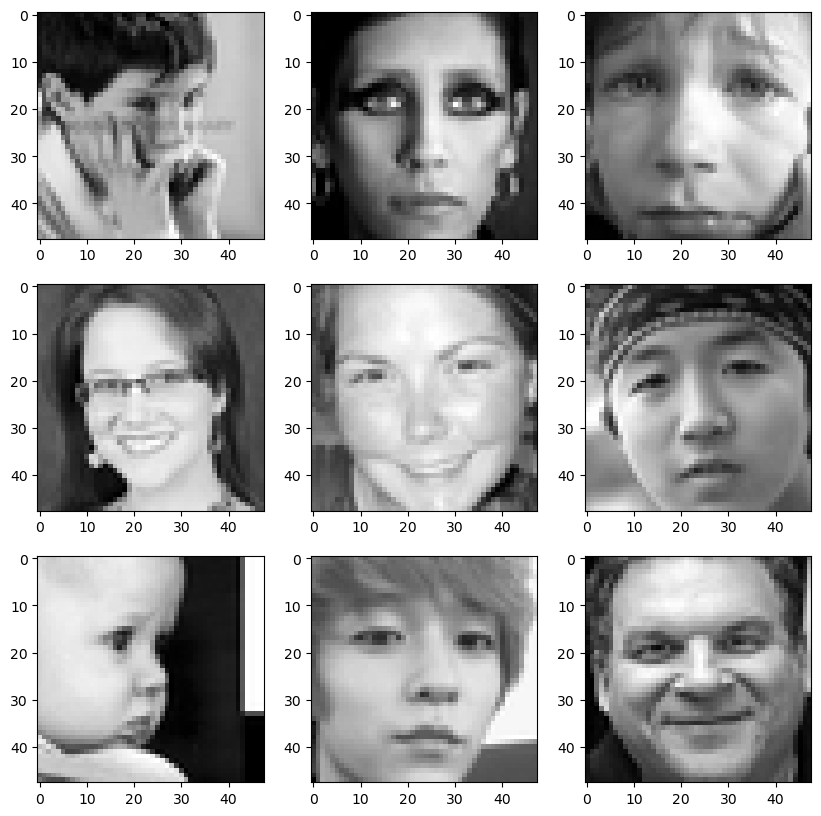

In [137]:
plt.figure(figsize = (10,10))
for index,image in enumerate(images[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape((48,48)),cmap='gray')
plt.show()

In [61]:
train_or_test = df5.iloc[:, 2].values
df5["Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [62]:
df5['emotion'].unique()

array([4, 6, 3])

In [63]:
reshaped_images = np.zeros((images.shape[0], 48, 48,1))
i = 0
for image in images:
  reshaped_images[i] = image.reshape((48,48,1))
  i+=1

In [65]:
reshaped_images.shape

(21264, 48, 48, 1)

In [66]:
norm_images = reshaped_images / 255.0

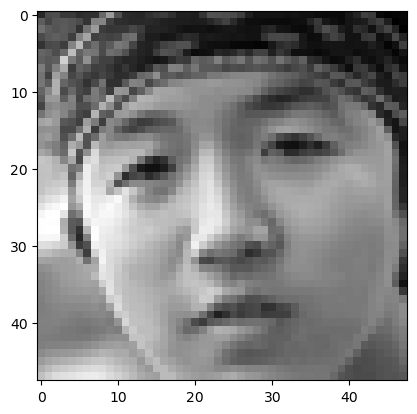

In [69]:
plt.imshow(norm_images[5].reshape((48,48)), cmap="gray")
plt.show()

In [84]:
dummies = pd.get_dummies(df5.emotion)
dummies.head()

,3,4,6
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [89]:
df6 = pd.concat([df5, dummies], axis=1)
df6.head()

,emotion,pixels,Usage,3,4,6
0,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,0,1,0
1,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,0,0,1
2,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training,0,1,0
3,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,1,0,0
4,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,1,0,0


In [94]:
df7 = df6.drop(["emotion"], axis=1)
df7.head()

,pixels,Usage,3,4,6
0,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,0,1,0
1,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,0,0,1
2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training,0,1,0
3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,1,0,0
4,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,1,0,0


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images, dummies, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17011, 48, 48, 1), (4253, 48, 48, 1), (17011, 3), (4253, 3))

In [115]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [116]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation="softmax"))


In [122]:
from tensorflow.keras.optimizers import legacy

opt = legacy.Adam(learning_rate=0.001)  # Replace lr with learning_rate

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])


In [124]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
532/532 [==============================] - 125s 234ms/step - loss: 0.6267 - accuracy: 0.7218 - val_loss: 0.7901 - val_accuracy: 0.6259
Epoch 2/10
532/532 [==============================] - 123s 231ms/step - loss: 0.5902 - accuracy: 0.7460 - val_loss: 0.6932 - val_accuracy: 0.6960
Epoch 3/10
532/532 [==============================] - 119s 223ms/step - loss: 0.5464 - accuracy: 0.7646 - val_loss: 0.7678 - val_accuracy: 0.6649
Epoch 4/10
532/532 [==============================] - 125s 236ms/step - loss: 0.5121 - accuracy: 0.7854 - val_loss: 0.7302 - val_accuracy: 0.6889
Epoch 5/10
532/532 [==============================] - 120s 225ms/step - loss: 0.4703 - accuracy: 0.8053 - val_loss: 0.7243 - val_accuracy: 0.6908
Epoch 6/10
532/532 [==============================] - 126s 237ms/step - loss: 0.4418 - accuracy: 0.8215 - val_loss: 0.8434 - val_accuracy: 0.6358
Epoch 7/10
532/532 [==============================] - 122s 229ms/step - loss: 0.4089 - accuracy: 0.8332 - val_loss: 0.7128 -

In [125]:
model.evaluate(X_test, y_test, verbose=1)

133/133 [==============================] - 8s 58ms/step - loss: 0.7621 - accuracy: 0.7094


[0.7620539665222168, 0.709381639957428]

In [126]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [129]:
emotions = ('happy', 'sad','neutral')

In [130]:
import PIL
from PIL import Image

In [ ]:
# import sys

# sys.path.append('/usr/local/lib/python2.7/site-packages')

In [131]:
import cv2

In [132]:
model.save("pramesh3.h5")

In [ ]:
model.save_weights("model_weights.h5")

In [133]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)